In [1]:
# install nltk, gensim and keep all texts in the text folder (or link)
# creating line-sentences for gensim.word2vec mode with nltk
import os
import nltk
import lib

In [2]:
# prepare the text
file_path = 'text/v4_combined.txt' # 'text/lucien_sfez.txt' 
lines = lib.line_sentences(file_path)
sentences = lib.sentences_word_tokenized(lines)

def print_lines():
    for line in lines:
        print line, word_tokenize(line)
        
def print_sentences():
    for sentence in sentences:
        print sentence

In [3]:
# build & save the model
import gensim
import math

#model.build_vocab(sentences)
model = gensim.models.Word2Vec(sentences, window = 7, workers=8)
#model.save()
model.init_sims(replace=True)
print model
print 'model memory size, mb:', model.estimate_memory()['total']/(math.pow(1024,2))
model.save('v4_combined')

Word2Vec(vocab=5640, size=100, alpha=0.025)
model memory size, mb: 6.99234008789


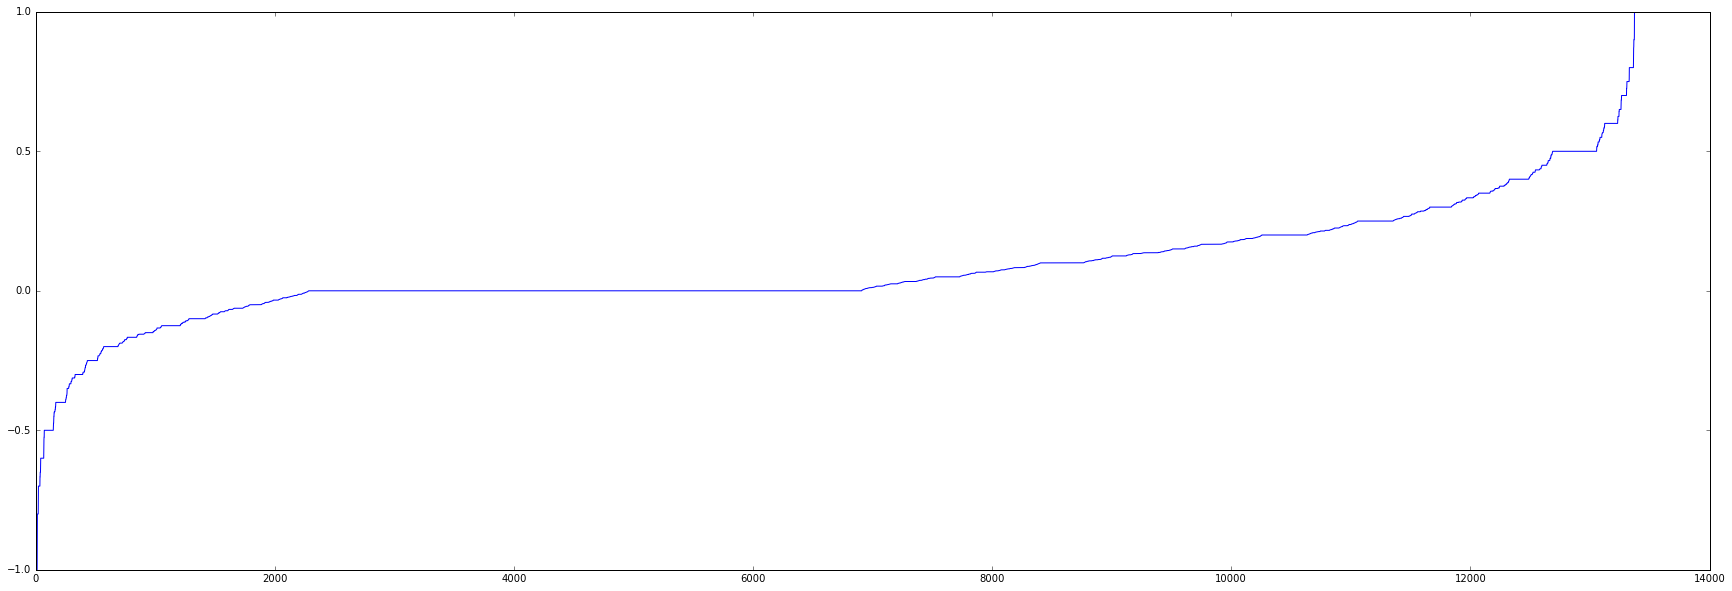

[-1.0, 585]
The prospect of studying these matters raises awful questions.
[-1.0, 5076]
It���s the worst of both worlds: a rentier class plus a meritocracy of appearance-peddlers carving up the world between them at the expense of everyone else.
[-1.0, 5685]
They call this evil media studies.
[-1.0, 8036]
He thinks that this is boring as well as paralysing for the work of the mediaarchaeologist.
[-1.0, 8602]
Guatemala remains one of the world���s worst horror chambers.
[-1.0, 9620]
The Martians got hurt the worst by consenting to allow the comet to come in.
[-1.0, 11325]
And this sets up a vicious circle, because everybody else gets his gun.
[-1.0, 12124]
And that would be awful.
[-1.0, 12159]
Then you feel terrible after that, because you got rid of God, but that means you got rid of yourself.
[-1.0, 12356]
Wouldn't that be awful?
[1.0, 11342]
And the visitors all came around and said 'Isn't that great!
[1.0, 12290]
'O Lord, our governor, how excellent is thy name in all the world.'
[

In [24]:
# Sentiment analysis of the whole text file
# plot, dumping and print of top, worst n senteces

from textblob import TextBlob
import numpy as np
import json

raw = unicode(open(file_path).read(), errors='replace')

blob = TextBlob(raw)

sentiments = []
c = 0
for sentence in blob.sentences:
    sentiments.append([sentence.sentiment.polarity,c])
    #print c,sentence
    c += 1


sen_sorted_indexed = sorted(sentiments, key= lambda s : s[0])
sen_sorted =map(lambda s : s[0],sen_sorted_indexed)


import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[30, 10])
plt.plot(sen_sorted)
plt.show()

dump_file = open('v4_combined_after_retune_sentiment_ranking.json','w')
c = 0
top_worst_n =10
for sen in sen_sorted_indexed:
    dump_file.write(json.dumps({'sen':sen,'text':blob.sentences[int(sen[1])].string}))
    if c < top_worst_n or c >= len(sen_sorted_indexed) - top_worst_n:
        print sen
        print blob.sentences[int(sen[1])]
    c += 1
dump_file.close()

In [4]:
from nltk import Text
import lib
cool_words = []

text = Text(lib.word_tokenize(unicode(open(file_path).read(), errors='replace')))

for word in model.vocab:  

    w_tag = lib.tag(word)
    #print word, w_tag[1]
    if w_tag[1] in ['NN','VB',"VBG",'RB','NNS','ADJ','ADV','ADP']:
        cool_words.append(word)
#         text.concordance(word)
        # #nltk.help.upenn_tagset(w_tag[1])
    
print len(cool_words), 'nice words'

#  djust do that for up to 20 words
# lib.scaled_dispersion_plot(text, cool_words)

4161 nice words


/Users/raminsoleymani/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [19]:
# print all (noun)words in the vocabulary and their n most similar words
for w in cool_words:
    if lib.tag(w)[1] == 'NN':
        print w #, lib.tag(w)[1], lib.tag(w)[1] == "NN"
        lib.word_similar_cosmul_p(model, w,topn=3)

SELF
word: SELF
imagery            0.995632946491
tracing            0.994005441666
epigenesis         0.993234217167
junk
word: junk
1994               0.989329457283
2014               0.989225268364
de                 0.988879144192
conclusion
word: conclusion
whom               0.9967674613
church             0.996582090855
evolved            0.99643355608
sick
word: sick
worse              0.995134413242
already            0.99433863163
here               0.994307219982
percent
word: percent
On                 0.994246006012
���art             0.994200706482
reflect            0.994192123413
inadequate
word: inadequate
gradual            0.99543684721
From               0.994792461395
introduced         0.9947052598
Electronica
word: Electronica
dreams             0.998979449272
million            0.998943269253
resources          0.998911798
demonstrate
word: demonstrate
enough             0.996293067932
conceive           0.995938181877
Aaron2             0.995213747025
ruling
w

In [22]:
# rest is not interesting/ running

# print sentences[0][0]
# print map(lambda w : w.encode('ascii',errors='ignore'),sentences[0])
# grammar = nltk.CFG.fromstring(sentences[0])
# parser = nltk.ChartParser(grammar)

Planetary-scale
['Planetary-scale', 'computation', 'takes', 'different', 'forms', 'at', 'different', 'scales', ':', 'energy', 'grids', 'and', 'mineral', 'sourcing', ';', 'cloud', 'infrastructure', ';', 'urban', 'software', 'and', 'public', 'service', 'privatization', ';', 'massive', 'universal', 'addressing', 'systems', ';', 'interfaces', 'drawn', 'by', 'the', 'augmentation', 'of', 'the', 'hand', ',', 'of', 'the', 'eye', ',', 'or', 'dissolved', 'into', 'objects', ';', 'users', 'both', 'overdetermined', 'by', 'self-quantification', 'and', 'exploded', 'by', 'the', 'arrival', 'of', 'legions', 'of', 'nonhuman', 'users', '(', 'sensors', ',', 'cars', ',', 'robots', ')', '.']


In [24]:
sentence = word_tokenize('this is a great tea, which you made by your own')
tagged = nltk.pos_tag(sentence)
#print tagged
entities = nltk.chunk.ne_chunk(tagged)
print entities

NameError: name 'word_tokenize' is not defined

In [23]:
import nltk
from nltk.corpus import treebank
from nltk.grammar import CFG, Nonterminal

tbank_productions = set(production for sent in treebank.parsed_sents()
                        for production in sent.productions())
tbank_grammar = CFG(Nonterminal('S'), list(tbank_productions))


In [49]:
sentence = word_tokenize('this is a great tea, which you made by your own')
parser = nltk.parse.EarleyChartParser(tbank_grammar)


In [ ]:
print parser.parse(tagged)